## Convolutional Neural Network 



There were difficulties when learning on macOs related to stopping the notebook, so I had to train and test on a test and val samples

In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.optimizers.legacy import Adam # It was the advice for MacOs

/Users/aleksandrerofeevskij/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [3]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = 'train'
val =   'val'
test =  'test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2480
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2500 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [18]:
model = Sequential()

# 1: +Convolutional
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
#     +Relu
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3: +Convolutional
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))

# 4:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5: +Convolutional
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3)))
#     +Relu
model.add(Activation('relu'))

# 6:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))

# 7:  +Flattening
model.add(Flatten())

# 8:  +Dense
model.add(Dense(64))
#     +ReLu
model.add(Activation('relu'))

# 9:  +Dropout
model.add(Dropout(0.5))

# 10: +Dense
model.add(Dense(1))
#     +Sigmoid
model.add(Activation('sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/15


/var/folders/1y/_z6qqtjn63ngbt9t8rsz5w1m0000gn/T/ipykernel_92313/1527835268.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


39/39 [==============================] - 11s 285ms/step - loss: 0.7099 - accuracy: 0.5160 - val_loss: 0.6906 - val_accuracy: 0.5234
Epoch 2/15
39/39 [==============================] - 11s 273ms/step - loss: 0.6686 - accuracy: 0.5883 - val_loss: 0.6524 - val_accuracy: 0.6114
Epoch 3/15
39/39 [==============================] - 10s 254ms/step - loss: 0.6406 - accuracy: 0.6359 - val_loss: 0.6301 - val_accuracy: 0.6410
Epoch 4/15
39/39 [==============================] - 10s 248ms/step - loss: 0.5851 - accuracy: 0.6913 - val_loss: 0.5942 - val_accuracy: 0.6785
Epoch 5/15
39/39 [==============================] - 11s 271ms/step - loss: 0.5339 - accuracy: 0.7299 - val_loss: 0.5598 - val_accuracy: 0.7109
Epoch 6/15
39/39 [==============================] - 10s 261ms/step - loss: 0.4960 - accuracy: 0.7484 - val_loss: 0.5680 - val_accuracy: 0.7048
Epoch 7/15
39/39 [==============================] - 10s 257ms/step - loss: 0.4784 - accuracy: 0.7742 - val_loss: 0.5874 - val_accuracy: 0.7159
Epoch 8/15

In [21]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(val_generator, nb_validation_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/1y/_z6qqtjn63ngbt9t8rsz5w1m0000gn/T/ipykernel_92313/2304885300.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 94.67%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

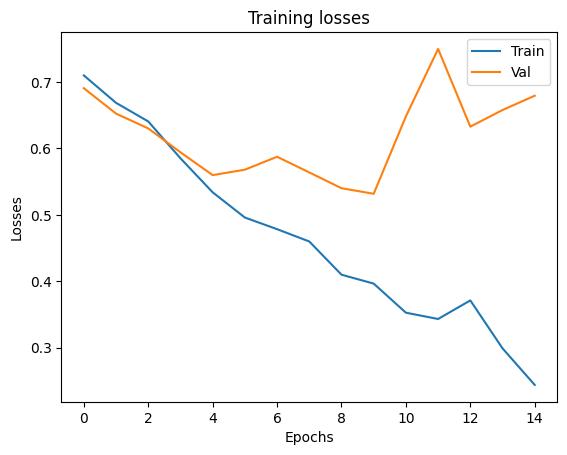

In [25]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Training losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.show()

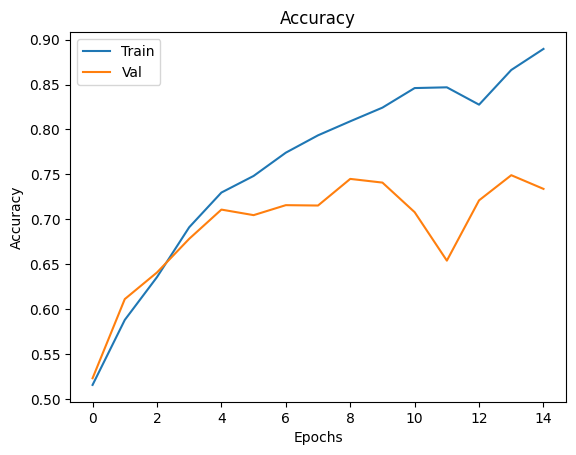

In [26]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [27]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 [==============================] - 19s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                             

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [28]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(Dropout(0.5))
# + Dense layer with 1 neuron
model.add(Dense(1))
# + sigmoid
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 activation_15 (Activation)  (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
 activation_16 (Activation)  (None, 1)                

In [34]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

E.g., it was like:


In [36]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5


/var/folders/1y/_z6qqtjn63ngbt9t8rsz5w1m0000gn/T/ipykernel_92313/1038184379.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


39/39 [==============================] - 172s 4s/step - loss: 0.8051 - accuracy: 0.5435 - val_loss: 0.6137 - val_accuracy: 0.6702
Epoch 2/5
39/39 [==============================] - 171s 4s/step - loss: 0.6364 - accuracy: 0.6404 - val_loss: 0.5351 - val_accuracy: 0.7833
Epoch 3/5
39/39 [==============================] - 176s 5s/step - loss: 0.5614 - accuracy: 0.7135 - val_loss: 0.4827 - val_accuracy: 0.8162
Epoch 4/5
39/39 [==============================] - 177s 5s/step - loss: 0.4964 - accuracy: 0.7574 - val_loss: 0.4408 - val_accuracy: 0.8355
Epoch 5/5
39/39 [==============================] - 171s 4s/step - loss: 0.4541 - accuracy: 0.7968 - val_loss: 0.4115 - val_accuracy: 0.8405


In [37]:
scores = model.evaluate_generator(val_generator, nb_validation_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/1y/_z6qqtjn63ngbt9t8rsz5w1m0000gn/T/ipykernel_92313/477001200.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 84.58%


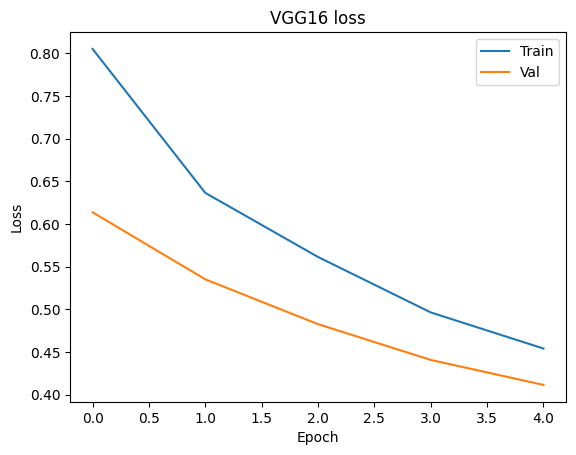

In [40]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('VGG16 loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

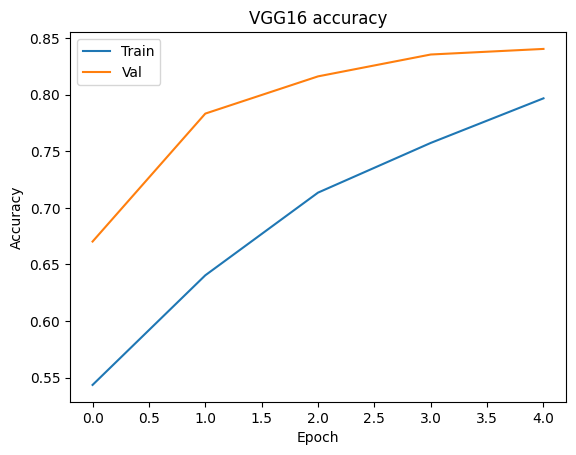

In [41]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('VGG16 accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Let's try Xception

In [5]:
from keras.applications import Xception

In [6]:
xception_net = Xception(weights='imagenet', 
                  include_top=False,
                  input_shape=(150, 150, 3))
xception_net.trainable = False

xception_net.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]

                                                                                                  
 block4_sepconv2_act (Activ  (None, 18, 18, 728)          0         ['block4_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block4_sepconv2 (Separable  (None, 18, 18, 728)          536536    ['block4_sepconv2_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block4_sepconv2_bn (BatchN  (None, 18, 18, 728)          2912      ['block4_sepconv2[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 conv2d_2 

                                                                                                  
 block7_sepconv1 (Separable  (None, 9, 9, 728)            536536    ['block7_sepconv1_act[0][0]'] 
 Conv2D)                                                                                          
                                                                                                  
 block7_sepconv1_bn (BatchN  (None, 9, 9, 728)            2912      ['block7_sepconv1[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block7_sepconv2_act (Activ  (None, 9, 9, 728)            0         ['block7_sepconv1_bn[0][0]']  
 ation)                                                                                           
                                                                                                  
 block7_se

 ormalization)                                                                                    
                                                                                                  
 add_7 (Add)                 (None, 9, 9, 728)            0         ['block9_sepconv3_bn[0][0]',  
                                                                     'add_6[0][0]']               
                                                                                                  
 block10_sepconv1_act (Acti  (None, 9, 9, 728)            0         ['add_7[0][0]']               
 vation)                                                                                          
                                                                                                  
 block10_sepconv1 (Separabl  (None, 9, 9, 728)            536536    ['block10_sepconv1_act[0][0]']
 eConv2D)                                                                                         
          

 block12_sepconv3_act (Acti  (None, 9, 9, 728)            0         ['block12_sepconv2_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 block12_sepconv3 (Separabl  (None, 9, 9, 728)            536536    ['block12_sepconv3_act[0][0]']
 eConv2D)                                                                                         
                                                                                                  
 block12_sepconv3_bn (Batch  (None, 9, 9, 728)            2912      ['block12_sepconv3[0][0]']    
 Normalization)                                                                                   
                                                                                                  
 add_10 (Add)                (None, 9, 9, 728)            0         ['block12_sepconv3_bn[0][0]', 
          

In [7]:
# add layers to Xception:

model = Sequential()
model.add(xception_net)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))
# + ReLu
model.add(Activation('relu'))
# + Dropout
model.add(Dropout(0.5))
# + Dense layer with 1 neuron
model.add(Dense(1))
# + sigmoid
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [8]:
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-5), 
    metrics=['accuracy']
)

In [9]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5


/var/folders/1y/_z6qqtjn63ngbt9t8rsz5w1m0000gn/T/ipykernel_1970/1038184379.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


39/39 [==============================] - 56s 1s/step - loss: 0.2830 - accuracy: 0.8855 - val_loss: 0.1134 - val_accuracy: 0.9572
Epoch 2/5
39/39 [==============================] - 53s 1s/step - loss: 0.1130 - accuracy: 0.9532 - val_loss: 0.1037 - val_accuracy: 0.9560
Epoch 3/5
39/39 [==============================] - 53s 1s/step - loss: 0.0953 - accuracy: 0.9623 - val_loss: 0.1008 - val_accuracy: 0.9585
Epoch 4/5
39/39 [==============================] - 52s 1s/step - loss: 0.0726 - accuracy: 0.9762 - val_loss: 0.0981 - val_accuracy: 0.9593
Epoch 5/5
39/39 [==============================] - 53s 1s/step - loss: 0.0594 - accuracy: 0.9803 - val_loss: 0.0980 - val_accuracy: 0.9609


In [10]:
scores = model.evaluate_generator(val_generator, nb_validation_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/var/folders/1y/_z6qqtjn63ngbt9t8rsz5w1m0000gn/T/ipykernel_1970/885338664.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(val_generator, nb_validation_samples // batch_size)


Accuracy on test data: 95.93%


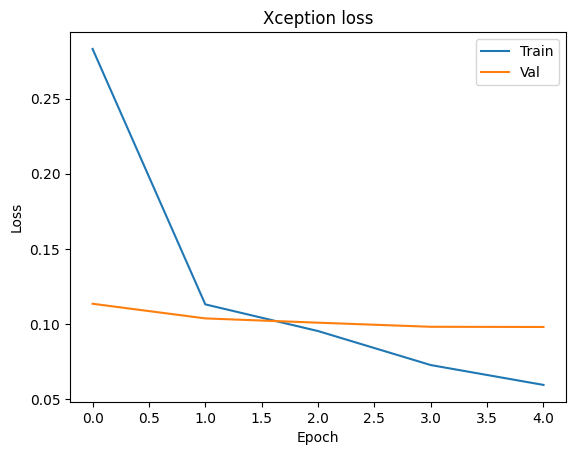

In [11]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Xception loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

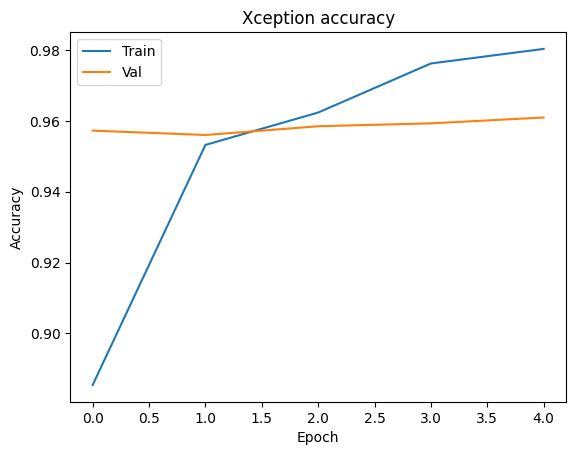

In [12]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Xception accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Custom function for prediction

## Display custom images

In [76]:
from IPython.display import Image, display

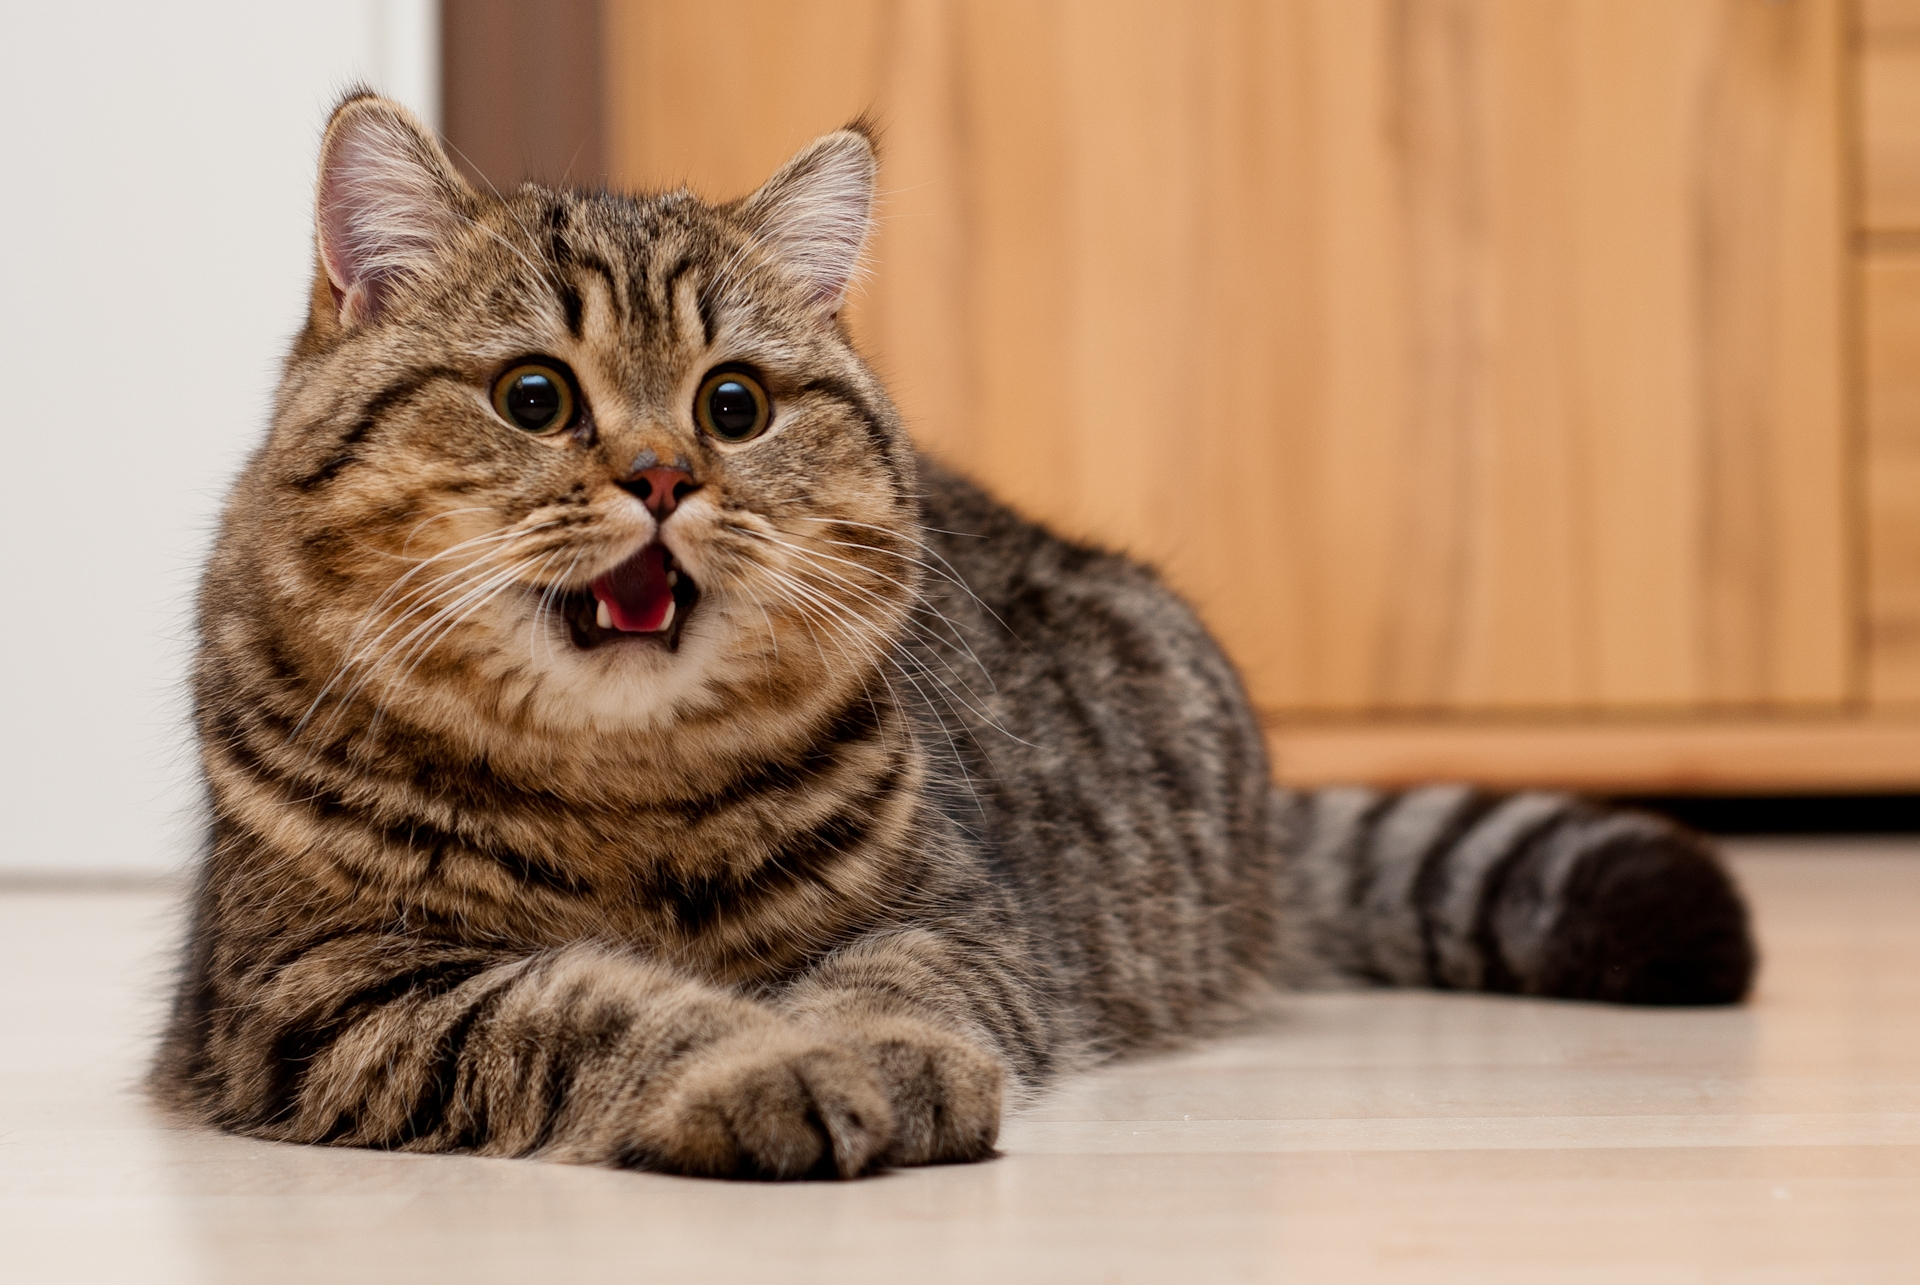

In [16]:
display(Image(filename='Cat.jpg'))

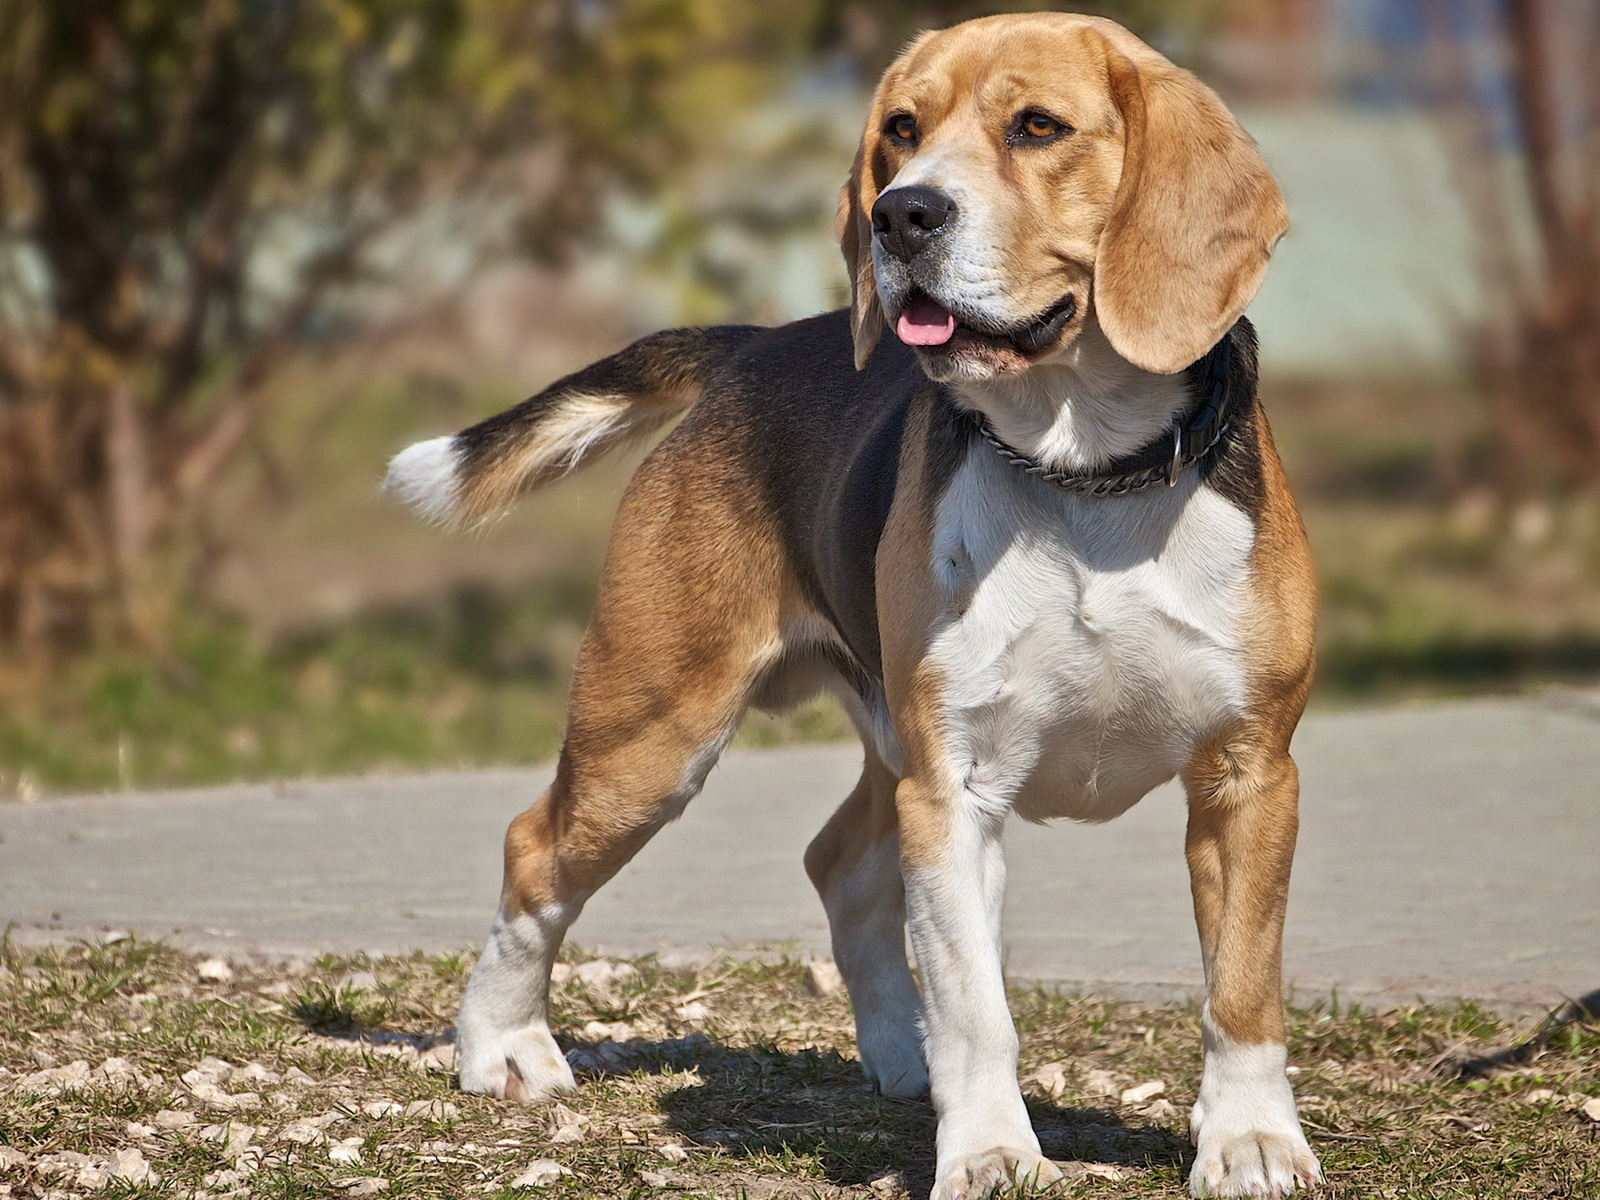

In [15]:
display(Image(filename='Dog.jpg'))

## Making predictions

In [19]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [17]:
def recognize_cat_or_dog(model, image_path):
    image = load_img(image_path, target_size=(150, 150))
    im_as_array = img_to_array(image)
    im_as_array = np.array([im_as_array])
    im_as_array = im_as_array.astype('float32') / 255.
    pred_proba = model.predict(im_as_array)[0][0]
    pred = round(pred_proba)
    if pred > 0.5:
        return 'Dog'
    else:
        return 'Cat'

In [23]:
photo = "Cat.jpg"
pred = recognize_cat_or_dog(model, photo)

print(f"Prediction for photo {photo} is {pred}, that is {'correct' if pred == photo.split('.')[0] else 'incorrect'}")

1/1 [==============================] - 0s 40ms/step
Prediction for photo Cat.jpg is Cat, that is correct


In [24]:
photo = "Dog.jpg"
pred = recognize_cat_or_dog(model, photo)

print(f"Prediction for photo {photo} is {pred}, that is {'correct' if pred == photo.split('.')[0] else 'incorrect'}")

1/1 [==============================] - 0s 42ms/step
Prediction for photo Dog.jpg is Dog, that is correct
